In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:

df = pd.read_excel (r'BD SEAT .xlsx')

In [3]:
df.head()

,RecordLocator,PassengerID,UnitDesignator,BookingBookDate,DepartureDate,FlightNumber,DepartureStation,ArrivalStation,SeatBookDate,SeatBookDateTime
0,OC2MVG,96902153,10A,2022-06-25 18:07:29.063,2022-06-26,83241,BOG,ADZ,NaT,NaN
1,LH7RNE,96902241,10B,2022-06-25 18:08:31.210,2022-06-26,83241,BOG,ADZ,NaT,NaN
2,LH7RNE,96902237,10C,2022-06-25 18:08:31.210,2022-06-26,83241,BOG,ADZ,NaT,NaN
3,LH7RNE,96902238,10D,2022-06-25 18:08:31.210,2022-06-26,83241,BOG,ADZ,NaT,NaN
4,LH7RNE,96902257,10E,2022-06-25 18:08:31.210,2022-06-26,83241,BOG,ADZ,NaT,NaN


In [4]:
dep = df['DepartureDate'].unique()
countt = df[df['DepartureDate'] == dep[0]]
len(countt['FlightNumber'].unique())

14

In [10]:
num = 0
minimum = 10000

fecha = 0
flight = 0


for i in dep:
    fli = df[df['DepartureDate'] == i]['FlightNumber'].unique()
    d = df[df['DepartureDate'] == i]
    
    for j in fli:
        num = max(d[d['FlightNumber'] == fli[0]]['RecordLocator'].value_counts() )       
        
        if num < minimum:
            minimum = num
            fecha = i
            flight = j            
print(minimum, flight, fecha)

5 59421 2022-06-08T00:00:00.000000000


In [6]:
final = df[df['DepartureDate'] == fecha]
finall = final[final['FlightNumber'] == flight]
finall['RecordLocator'].value_counts()

TDQHSA    5
WYE6XM    5
LYDJSJ    4
ICEKUD    4
I5F7HI    4
C7VE7M    4
N7I32P    4
NHFW6B    3
CEKW4H    3
O85TQC    3
YD7T2A    3
OFBIXK    2
IBY62D    2
D5CUHI    2
O9KW7Z    2
WDK6GA    2
HY84FW    2
C4PSPY    2
BFHRXH    2
BD8UHN    2
U3GEYR    2
TDEIRQ    2
C7LCVP    2
C94L5J    2
OFWHMX    2
Y6V32F    2
V4WH6L    2
HHJLQR    2
FHM9YR    1
LDIFGN    1
LFGIYK    1
P8E4HP    1
W82CXF    1
DGFLGE    1
AF69GH    1
HCMKHQ    1
C8G38Z    1
UFTVSK    1
WE31TQ    1
X9H3QP    1
KD3WNQ    1
TFQI9H    1
CYF89G    1
UC5VYG    1
GF1WWK    1
BH5UXR    1
IDL3HN    1
Name: RecordLocator, dtype: int64

In [7]:
df2.head()

,RecordLocator,PassengerID,UnitDesignator,BookingBookDate,DepartureDate,FlightNumber,DepartureStation,ArrivalStation,SeatBookDate,SeatBookDateTime
417,MFUDXX,95258177,14A,2022-04-11 15:00:34.340,2022-06-15,55101,MDE,ADZ,2022-04-11,10:00:34.3400000
418,MFUDXX,95258178,14B,2022-04-11 15:00:34.340,2022-06-15,55101,MDE,ADZ,2022-04-11,10:00:34.3400000
419,MFUDXX,95258179,14C,2022-04-11 15:00:34.340,2022-06-15,55101,MDE,ADZ,2022-04-11,10:00:34.3400000
421,LH2J7R,90464669,14E,2022-06-11 22:38:02.377,2022-06-15,55101,MDE,ADZ,2022-02-02,17:40:19.3300000
422,LH2J7R,90464668,14F,2022-06-11 22:38:02.377,2022-06-15,55101,MDE,ADZ,2022-02-02,17:40:19.3300000


In [8]:
lim = 10

values = df2['UnitDesignator'].value_counts()[0:lim]
courses = values.keys()

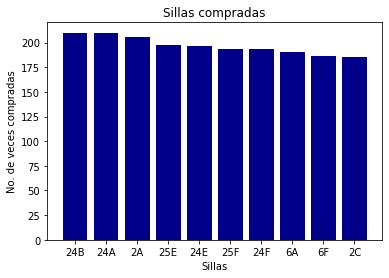

In [9]:
plt.bar(courses, values, color = 'darkblue')
plt.xlabel("Sillas")
plt.ylabel("No. de veces compradas")
plt.title("Sillas compradas")
plt.show()

In [10]:
len(df2['FlightNumber'].unique())

48

In [11]:
### Se puede normalizar el número de sillas compradas y determinar un "plus" para cada silla y multiplicarlo por el valor norm
### ¿Cómo determino el número de vuelos en la base de datos?

In [12]:
len(df2['UnitDesignator'].value_counts())

188

In [13]:
maximo = max(df2['UnitDesignator'].value_counts())

In [14]:
normalizado = df2['UnitDesignator'].value_counts()/maximo

In [15]:
len(normalizado)

188

In [16]:
vec = {}
for i in range(0, len(normalizado.index)):
    if len(normalizado.index[i]) == 2 :
        if normalizado.index[i][-1] == 'A':
            vec[int(normalizado.index[i][0])] = 1
        elif normalizado.index[i][-1] == 'B':
            vec[int(normalizado.index[i][0])+32] = 1
        elif normalizado.index[i][-1] == 'C':
            vec[int(normalizado.index[i][0])+32+32] = 1
        elif normalizado.index[i][-1] == 'D':
            vec[int(normalizado.index[i][0])+32+32+31] = 1
        elif normalizado.index[i][-1] == 'E':
            vec[int(normalizado.index[i][0])+32+32+31+31] = 1
        elif normalizado.index[i][-1] == 'F':
            vec[int(normalizado.index[i][0])+32+32+31+31+31] = 1
            
    elif len(normalizado.index[i]) == 3 :
        if normalizado.index[i][-1] == 'A':
            vec[int(normalizado.index[i][0:2])] = 1
        elif normalizado.index[i][-1] == 'B':
            vec[int(normalizado.index[i][0:2])+32] = 1
        elif normalizado.index[i][-1] == 'C':
            vec[int(normalizado.index[i][0:2])+32+32] = 1
        elif normalizado.index[i][-1] == 'D':
            vec[int(normalizado.index[i][0:2])+32+32+31] = 1
        elif normalizado.index[i][-1] == 'E':
            vec[int(normalizado.index[i][0:2])+32+32+31+31] = 1
        elif normalizado.index[i][-1] == 'F':
            vec[int(normalizado.index[i][0:2])+32+32+31+31+31] = 1

In [17]:
contador = -1
for i in vec.keys():
    contador += 1
    vec[i] = normalizado.values[contador]

In [18]:
vec

{56: 1.0,
 24: 1.0,
 2: 0.9809523809523809,
 151: 0.9428571428571428,
 150: 0.9380952380952381,
 182: 0.919047619047619,
 181: 0.919047619047619,
 6: 0.9047619047619048,
 163: 0.8857142857142857,
 66: 0.8809523809523809,
 155: 0.861904761904762,
 57: 0.861904761904762,
 97: 0.861904761904762,
 186: 0.8285714285714286,
 59: 0.8142857142857143,
 38: 0.8095238095238095,
 27: 0.7904761904761904,
 132: 0.7666666666666667,
 54: 0.7571428571428571,
 16: 0.7523809523809524,
 3: 0.7428571428571429,
 159: 0.7428571428571429,
 25: 0.7380952380952381,
 26: 0.7285714285714285,
 22: 0.719047619047619,
 48: 0.719047619047619,
 1: 0.7095238095238096,
 47: 0.7095238095238096,
 46: 0.7,
 8: 0.7,
 34: 0.7,
 7: 0.7,
 152: 0.6952380952380952,
 158: 0.680952380952381,
 184: 0.6714285714285714,
 29: 0.6619047619047619,
 153: 0.6619047619047619,
 33: 0.6619047619047619,
 58: 0.6523809523809524,
 53: 0.6523809523809524,
 4: 0.6476190476190476,
 61: 0.6476190476190476,
 160: 0.6428571428571429,
 40: 0.633333333

In [19]:
values = df['RecordLocator'].value_counts()[0:5]
courses = values.keys()

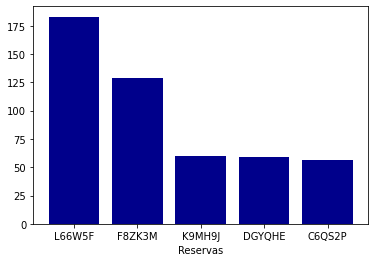

In [25]:
plt.bar(courses, values, color = 'darkblue')
plt.xlabel("Reservas")

plt.show()

In [26]:
values

L66W5F    183
F8ZK3M    129
K9MH9J     60
DGYQHE     59
C6QS2P     56
Name: RecordLocator, dtype: int64

In [27]:
df

,RecordLocator,PassengerID,UnitDesignator,BookingBookDate,DepartureDate,FlightNumber,DepartureStation,ArrivalStation,SeatBookDate,SeatBookDateTime
0,OC2MVG,96902153,10A,2022-06-25 18:07:29.063,2022-06-26,83241,BOG,ADZ,NaT,NaN
1,LH7RNE,96902241,10B,2022-06-25 18:08:31.210,2022-06-26,83241,BOG,ADZ,NaT,NaN
2,LH7RNE,96902237,10C,2022-06-25 18:08:31.210,2022-06-26,83241,BOG,ADZ,NaT,NaN
3,LH7RNE,96902238,10D,2022-06-25 18:08:31.210,2022-06-26,83241,BOG,ADZ,NaT,NaN
4,LH7RNE,96902257,10E,2022-06-25 18:08:31.210,2022-06-26,83241,BOG,ADZ,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...
55595,UI1LTE,100851882,7D,2022-06-26 14:50:09.017,2022-06-29,59541,BOG,ADZ,2022-06-26,09:50:09.0166667
55596,A7JPTC,100851497,7E,2022-06-26 14:42:33.203,2022-06-29,59541,BOG,ADZ,2022-06-26,09:42:33.2033333
55597,A7JPTC,100851498,7F,2022-06-26 14:42:33.203,2022-06-29,59541,BOG,ADZ,2022-06-26,09:42:33.2033333
55598,WCNBYG,100966847,8A,2022-06-28 11:40:13.423,2022-06-29,59541,BOG,ADZ,2022-06-28,06:40:13.4233333


In [28]:
df['DepartureDate'][55595]

Timestamp('2022-06-29 00:00:00')

In [29]:
df3 = df[df['DepartureDate'] == df['DepartureDate'][0]]
df3

,RecordLocator,PassengerID,UnitDesignator,BookingBookDate,DepartureDate,FlightNumber,DepartureStation,ArrivalStation,SeatBookDate,SeatBookDateTime
0,OC2MVG,96902153,10A,2022-06-25 18:07:29.063,2022-06-26,83241,BOG,ADZ,NaT,NaN
1,LH7RNE,96902241,10B,2022-06-25 18:08:31.210,2022-06-26,83241,BOG,ADZ,NaT,NaN
2,LH7RNE,96902237,10C,2022-06-25 18:08:31.210,2022-06-26,83241,BOG,ADZ,NaT,NaN
3,LH7RNE,96902238,10D,2022-06-25 18:08:31.210,2022-06-26,83241,BOG,ADZ,NaT,NaN
4,LH7RNE,96902257,10E,2022-06-25 18:08:31.210,2022-06-26,83241,BOG,ADZ,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...
52624,Y6IWGI,96159069,9B,2022-04-25 19:44:18.473,2022-06-26,56261,BOG,ADZ,2022-04-25,14:44:18.4733333
52625,C638WV,94442927,9C,2022-03-31 02:06:17.887,2022-06-26,56261,BOG,ADZ,NaT,NaN
52626,KEWTJK,93248601,9D,2022-03-14 15:50:41.870,2022-06-26,56261,BOG,ADZ,NaT,NaN
52627,W7PG7C,89396988,9E,2022-01-17 02:14:45.190,2022-06-26,56261,BOG,ADZ,NaT,NaN


In [30]:
df4 = df3[df3['FlightNumber'] == df3['FlightNumber'][52624]]
df4

,RecordLocator,PassengerID,UnitDesignator,BookingBookDate,DepartureDate,FlightNumber,DepartureStation,ArrivalStation,SeatBookDate,SeatBookDateTime
51407,E8433M,94751569,10A,2022-04-04 19:34:47.650,2022-06-26,56261,BOG,ADZ,2022-06-23,21:40:04.5266667
51408,E8433M,94751572,10B,2022-04-04 19:34:47.650,2022-06-26,56261,BOG,ADZ,2022-06-23,21:40:04.5266667
51409,F5U2XV,89376179,10C,2022-01-16 20:44:17.650,2022-06-26,56261,BOG,ADZ,NaT,NaN
51410,HB5LRG,91195363,10D,2022-02-13 19:45:31.510,2022-06-26,56261,BOG,ADZ,NaT,NaN
51411,E8433M,94751567,10E,2022-04-04 19:34:47.650,2022-06-26,56261,BOG,ADZ,2022-06-23,21:40:04.5266667
...,...,...,...,...,...,...,...,...,...,...
52624,Y6IWGI,96159069,9B,2022-04-25 19:44:18.473,2022-06-26,56261,BOG,ADZ,2022-04-25,14:44:18.4733333
52625,C638WV,94442927,9C,2022-03-31 02:06:17.887,2022-06-26,56261,BOG,ADZ,NaT,NaN
52626,KEWTJK,93248601,9D,2022-03-14 15:50:41.870,2022-06-26,56261,BOG,ADZ,NaT,NaN
52627,W7PG7C,89396988,9E,2022-01-17 02:14:45.190,2022-06-26,56261,BOG,ADZ,NaT,NaN


In [31]:
values = df4['RecordLocator'].value_counts()
courses = values.keys()
values

KEWTJK    20
PG5PKH    18
E8433M     8
RFEVTK     8
C6G6XF     8
          ..
W8M9XS     1
H6TLPF     1
S85EGC     1
S7PSUF     1
F66UMF     1
Name: RecordLocator, Length: 62, dtype: int64

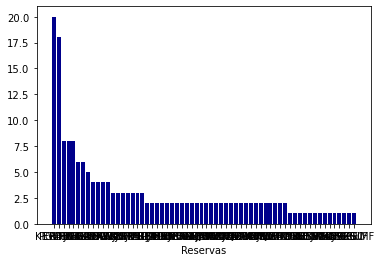

In [32]:
plt.bar(courses, values, color = 'darkblue')
plt.xlabel("Reservas")

plt.show()

In [33]:
values

KEWTJK    20
PG5PKH    18
E8433M     8
RFEVTK     8
C6G6XF     8
          ..
W8M9XS     1
H6TLPF     1
S85EGC     1
S7PSUF     1
F66UMF     1
Name: RecordLocator, Length: 62, dtype: int64

In [27]:
fechas = df['DepartureDate'].unique()
NoVuelos = df['FlightNumber'].unique()

In [28]:
values = {}
contador = 0
for i in fechas:
    df3 = df[df['DepartureDate'] == i]
    NoVuelos = df3['FlightNumber'].unique()
    for j in NoVuelos:
        contador += 1
        df4 = df3[df3['FlightNumber'] == j]
        values[contador] = df4['RecordLocator'].value_counts()

In [29]:
values[1]

LH7RNE    23
YF8J9K    22
OC2MVG    20
EESQ6H    20
X9IHQP    20
UDIM5A    20
K6BU5F    20
W75Z6F    20
ADJ12K    19
Name: RecordLocator, dtype: int64

In [30]:
vecTotal = []
for i in values.keys(): 
    reservas = values[i]
    for j in reservas:
        vecTotal.append(j)

In [31]:
dfFinal = pd.DataFrame()

In [32]:
dfFinal['No. reservas'] = vecTotal

In [33]:
distr = dfFinal['No. reservas'].value_counts()

In [34]:
courses = []
values = []
for i in distr.index:
    courses.append(i)
    values.append(distr[i])

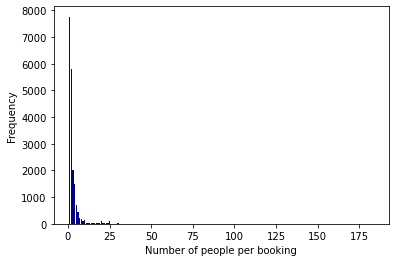

<Figure size 216x216 with 0 Axes>

<Figure size 216x216 with 0 Axes>

In [41]:
from matplotlib.pyplot import figure
plt.bar(courses, values, color = 'darkblue')
plt.xlabel("Number of people per booking")
plt.ylabel("Frequency")
plt.show()
plt.figure(figsize=(3, 3))

In [36]:
values1 = values/sum(values)

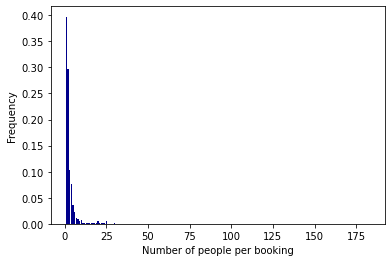

<Figure size 216x216 with 0 Axes>

<Figure size 216x216 with 0 Axes>

In [40]:
plt.bar(courses, values1, color = 'darkblue')
plt.xlabel("Number of people per booking")
plt.ylabel("Frequency")
plt.show()
plt.figure(figsize=(3, 3))

In [38]:
sum(values)

19537

In [39]:
df3 = df[df['DepartureDate'] == df['DepartureDate'][0]]
df4 = df3[df3['FlightNumber'] == df3['FlightNumber'][52624]]
df4['RecordLocator'].value_counts()

KEWTJK    20
PG5PKH    18
E8433M     8
RFEVTK     8
C6G6XF     8
          ..
W8M9XS     1
H6TLPF     1
S85EGC     1
S7PSUF     1
F66UMF     1
Name: RecordLocator, Length: 62, dtype: int64